# Heart Disease Prediction

### Goal: To predict whether a patient has a heart disease or not.
Data Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [1]:
#1. Import necessary packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.datasets as skdatasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#2. Load the csv data
file_path = r"C:\Users\user\Desktop\AI07\Projects\P1\heart.csv"
data = pd.read_csv(file_path, sep=",")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#Inspect for missing values
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [4]:
#3. Data Preparation
#(a) Check correlation between features
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#(b) Split the data into features and labels
features = data.drop('target', axis=1)
labels = data.target

In [6]:
#3. Perfrom a train test split to obtain training and testing datasets
SEED = 12345
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=SEED)

In [7]:
#4. Perform Data Normalization
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X_train)
X_train = standardizer.transform(X_train)
X_test = standardizer.transform(X_test)

In [8]:
#5. Define your Neural Network model
nClass = len(np.unique(y_test)) #If classification, better define the nClass
model = keras.Sequential()

#Start input layer, in this case, we can use normalize layer
model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))
#Now we can add the hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
#Add the output layer (be careful about the number of nodes and activation function)
model.add(layers.Dense(nClass, activation='softmax'))

In [9]:
model.summary() #show the structure of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 5,186
Trainable params: 5,186
Non-trainable params: 0
_________________________________________________________________


In [10]:
#6. Compile your model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
#7.Perform model training
BATCH_SIZE = 32
EPOCHS = 20

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/20
23/23 [==============================] - 1s 11ms/step - loss: 0.5020 - accuracy: 0.7768 - val_loss: 0.4443 - val_accuracy: 0.7922
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.8522 - val_loss: 0.3906 - val_accuracy: 0.8117
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8675 - val_loss: 0.3727 - val_accuracy: 0.8312
Epoch 4/20
23/23 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8773 - val_loss: 0.3645 - val_accuracy: 0.8409
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2937 - accuracy: 0.8828 - val_loss: 0.3391 - val_accuracy: 0.8377
Epoch 6/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2776 - accuracy: 0.8996 - val_loss: 0.3380 - val_accuracy: 0.8409
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.2592 - accuracy: 0.8982 - val_loss: 0.3115 - val_accuracy: 0.8506
Epoch 8/20
23/23 [=

In [12]:
#Print the last loss and accuracy
train_scores = model.evaluate(X_train, y_train)
print('average training loss: ',round(train_scores[0],4))
print('average training accuracy: ', round(train_scores[1],4))
val_scores = model.evaluate(X_test, y_test)
print('average test loss: ',round(val_scores[0],4))
print('average test accuracy: ', round(val_scores[1],4))

23/23 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.96 - 0s 1ms/step - loss: 0.0785 - accuracy: 0.9763
average training loss:  0.0785
average training accuracy:  0.9763
10/10 [==============================] - 0s 2ms/step - loss: 0.1667 - accuracy: 0.9156
average test loss:  0.1667
average test accuracy:  0.9156


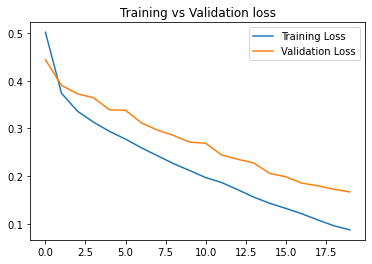

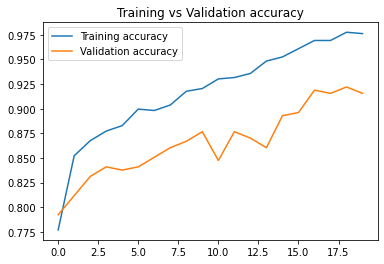

<Figure size 432x288 with 0 Axes>

In [13]:
#8. Visualize the result of model training
training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_x_axis = history.epoch

plt.plot(epochs_x_axis , training_loss, label='Training Loss')
plt.plot(epochs_x_axis, val_loss, label='Validation Loss')
plt.title("Training vs Validation loss") # easier to detect over/under fitting using validation plot
plt.legend()
plt.figure()

plt.plot(epochs_x_axis, training_acc, label='Training accuracy')
plt.plot(epochs_x_axis, val_acc, label='Validation accuracy')
plt.title('Training vs Validation accuracy')
plt.legend()
plt.figure()

plt.show()

In [14]:
#9. Make Prediction with your model
predictions = np.argmax(model.predict(X_test), axis=1)

In [15]:
test_labels = np.array(y_test)
prediction_vs_labels = np.transpose(np.vstack((predictions, test_labels)))

In [16]:
pred_vs_ytest = pd.DataFrame(data=prediction_vs_labels, columns=['prediction', 'labels'])
pred_vs_ytest

,prediction,labels
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
303,0,0
304,0,0
305,1,1
306,0,0
